In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [48]:
data = pd.read_csv('Stock_Price_set.csv')

In [49]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [105]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Prediction
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03,1009.000000
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06,418.338332
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06,92.664814
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06,258.076632
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06,338.207482
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06,418.338332
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06,498.469182
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07,578.600033


In [51]:
data.shape

(1009, 7)

In [52]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

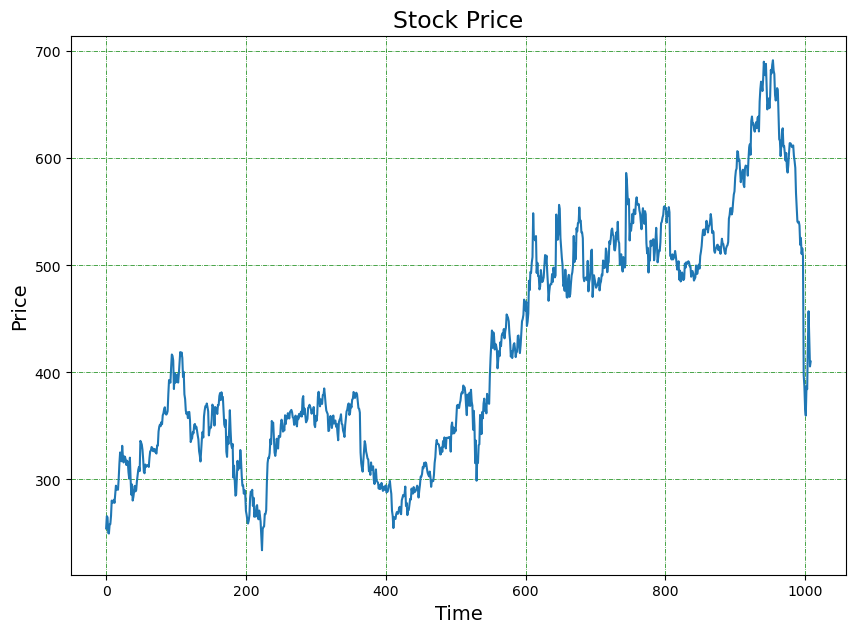

In [53]:
data['Close'].plot(figsize = (10,7))
plt.title('Stock Price', fontsize = 17)
plt.ylabel('Price', fontsize = 14)
plt.xlabel('Time', fontsize = 14)
plt.grid(which = 'major', color = 'g',linestyle = '-.', linewidth = 0.5)
plt.show()

# USING LINEAR REGRESSION 
TRAIN AND TEST DATA 

In [54]:
#Import package for splitting dataset
from sklearn.model_selection import train_test_split


In [55]:
#split data into train 7 test set : 80%/20%
train,test = train_test_split(data, test_size = 0.20)

# CREATING TRANING MODEL

In [56]:
#import package for linear model 
from sklearn.linear_model import LinearRegression 

In [57]:
#Reshape index column to 2D array for .fit() method 
X_train = np.array(train.index).reshape(-1,1)
y_train = train["Close"]

In [58]:
#Create Linear Regression object 
model = LinearRegression()
#Fit linear model using train dataset
model.fit(X_train, y_train)


LinearRegression()

In [59]:
#The coefficient 
print('Slope : ', model.coef_)
#The intercept
print('Intercept : ', model.intercept_)

Slope :  [0.31797956]
Intercept :  258.07663153779026



# MODEL EVALUATION 

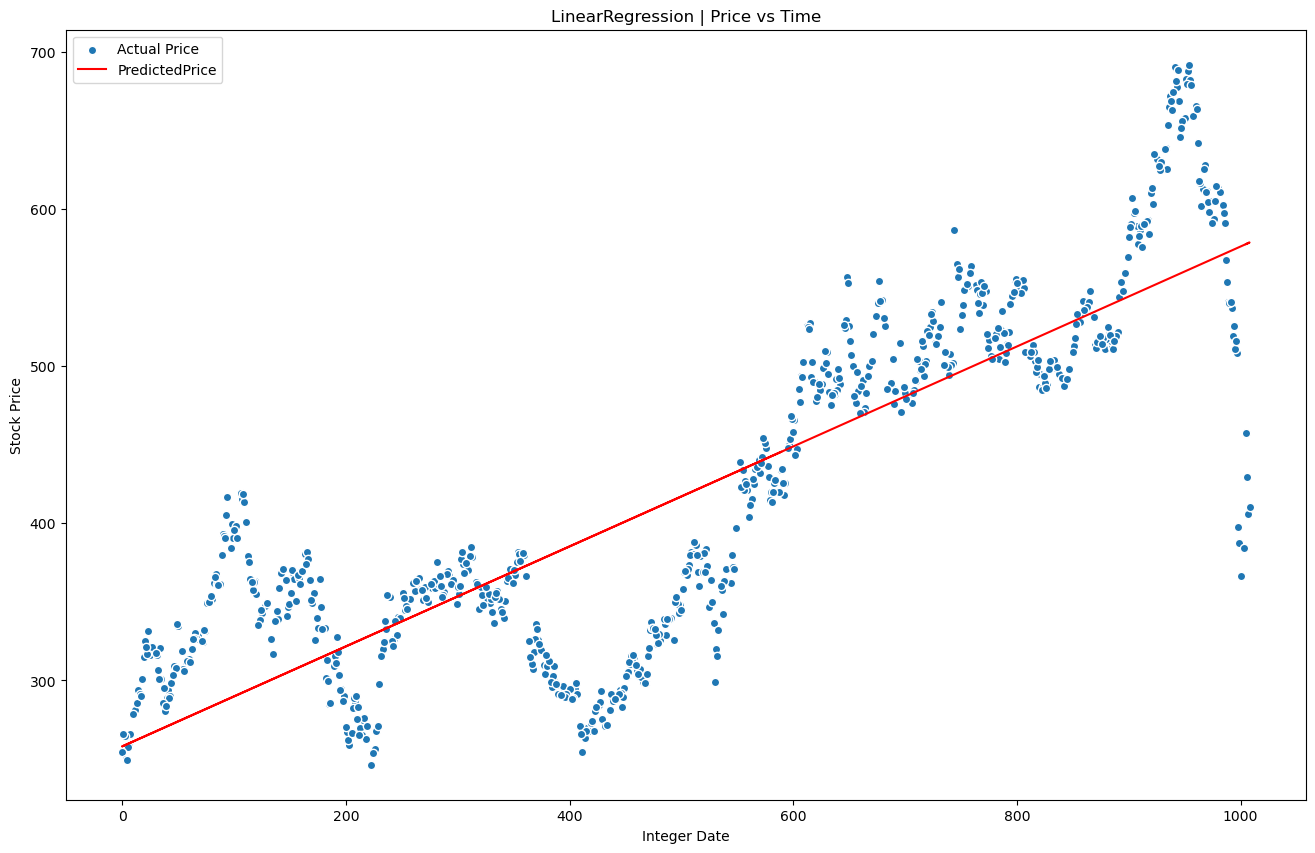

In [67]:
#Train set graph 
plt.figure(1, figsize = (16,10))
plt.title('LinearRegression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor = 'w', label = 'Actual Price')
plt.plot(X_train, model.predict(X_train), color = 'r', label = 'PredictedPrice')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# PREDICTING OUR MODEL

In [81]:
#Create test arrays
X_test = np.array(test.index).reshape(-1,1)
y_test = test['Close']

In [82]:
#Generate array with predicted value 
y_pred =model.predict(X_test)

In [83]:
df = pd.DataFrame({'actual': y_test,'predicted': y_pred})

In [84]:
df

,actual,predicted
512,386.190002,420.882169
360,373.250000,372.549275
228,267.660004,330.575972
77,351.290009,282.561058
550,413.549988,432.965392
...,...,...
52,327.769989,274.611569
298,351.140015,352.834542
297,367.649994,352.516562
352,374.600006,370.005438


# EVALUATION

In [85]:
graph = df.head(20)

<AxesSubplot:>

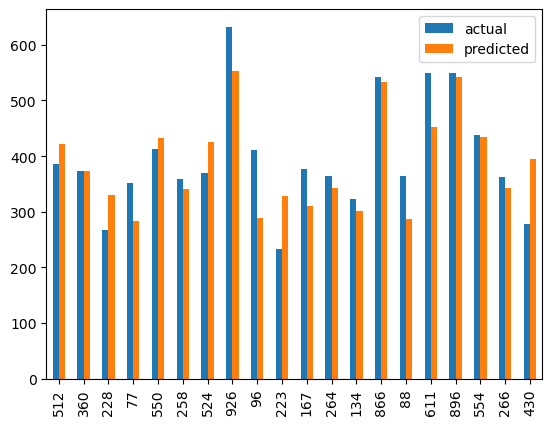

In [87]:
graph.plot(kind = 'bar')

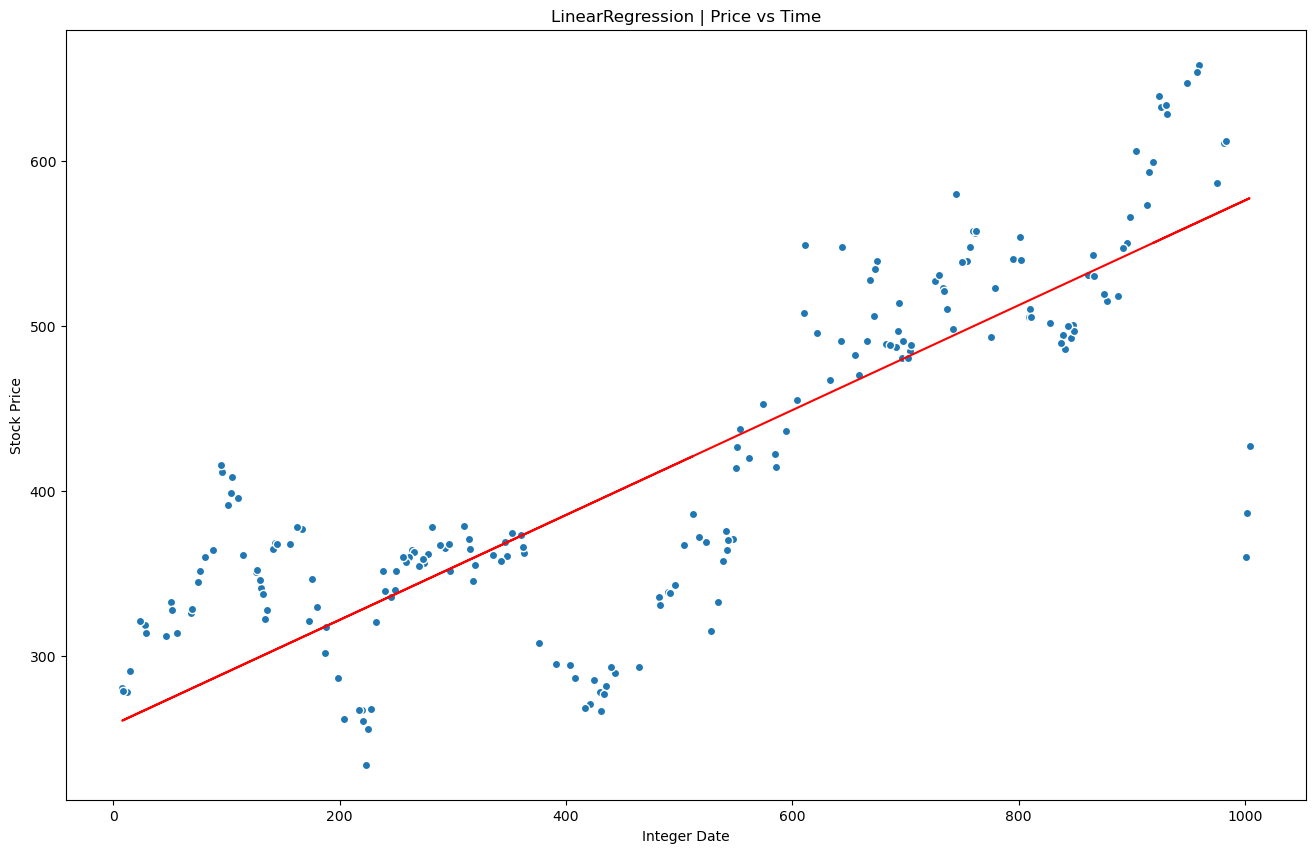

In [89]:
plt.figure(1, figsize = (16,10))
plt.title('LinearRegression | Price vs Time')
plt.scatter(X_test, y_test, edgecolor = 'w', label = 'Actual Price')
plt.plot(X_test, model.predict(X_test), color = 'r', label = 'PredictedPrice')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')

plt.show()

In [93]:
#Add new column for prediction to df
data['Prediction'] = model.predict(np.array(data.index).reshape(-1,1))

In [94]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,258.076632
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,258.394611
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,258.712591
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,259.030570
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,259.348550


# Finding Errors

In [95]:
#Importing metrics package from sklearn for statistical analysis 
from sklearn import metrics

In [103]:
#Calculate and print values of MSE,MAE AND RMSE
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  45.10843386573371
Mean Squared Error:  3476.0725105430306
Root Mean Squared Error:  58.958226826652705
